원문: Moler, Cleve B. Numerical computing with MATLAB. Society for Industrial and Applied Mathematics, 2008.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

세상에서 가장 흥미 있는 숫자는 어떤 것일까? 아마도 여러분 가운데는 원주율, 자연대수, 또는 17을 좋아하는 사람들이 있을 것이다. 어떤 사람은 phi, 즉 황금률을 선택할 수도 있다. 아래 계산식은 황금률을 계산하는 것이다.

In [2]:
phi = (1 + 5 ** 0.5) * 0.5
print('%g' % phi)

1.61803


더 많은 자릿수를 표시해 보자

In [4]:
print('%17.16g' % phi)

1.618033988749895


바로 위에서는 phi 를 새로 계산한 것이 아니고, 유효숫자를 16자리로 표시한 것이다.
황금률은 수학에서 자주 나타난다. 여기서도 자주 나타날 것이다.  황금률은 황금 직사각형에서 유래하였는데, 그림 1.1 에 표시되어 있다. 황금 직사각형에서 정사각형 부분을 제거하면 닮은꼴인 직사각형이 남는다.

(-0.088991869381244232, 1.8688292570061287, -0.055000000000000007, 1.155)

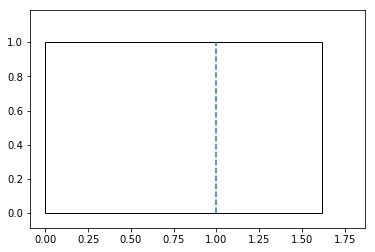

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

ax = plt.gca()
ax.cla()

phi = (1 + 5 ** 0.5) * 0.5

# add a rectangle
rect = patches.Rectangle((0.0, 0.0), phi, 1.0, fill=False)
rect_margin = patches.Rectangle((0.0, 0.0), phi * 1.1, 1.1, fill=False, edgecolor="none")
ax.add_patch(rect)
ax.add_patch(rect_margin)

plt.plot((1.0, 1.0), (0.0, 1.0), '--')

plt.axis('equal')
plt.show()

$\frac{1}{\phi} = \frac{\phi - 1}{1}$

이 방정식이 뜻하는 것은, 황금률의 역수를 구하려면, 황금률에서 1을 빼면 된다는 것이다.  이런 특징을 가진 숫자가 몇가지나 되겠는가?
가로세로비 등식의 양변에 황금률을 곱하면 다항식을 얻는다.

$\phi^2 - \phi - 1 = 0$

이 2차방정식의 근은 다음 식으로 주어진다.

$\phi= \frac{1 \pm \sqrt 5}{2}$

양의 근이 황금률이다.

In [23]:
import numpy as np
p = np.array([1, -1, -1])

$p(x) = x^2 - x - 1 $

을 나타낸다.  근은 roots() 함수로 계산한다.

In [24]:
np.roots(p)

array([ 1.61803399, -0.61803399])

위 두 수 만이, 1을 뺀 값과 그 역수가 같다.
기호처리로도 가로세로비 식을 풀 수 있는데, 다항식으로 바꾸지 않아도 된다. 기호 변수를 이용하여 식을 세우면 된다.

In [30]:
import sympy as sp
x = sp.symbols('x')
r = sp.solve(sp.Eq(1/x, x - 1), x)
print(r)

[1/2 + sqrt(5)/2, -sqrt(5)/2 + 1/2]


list

좀 더 보기 좋게 바꾸고 싶다면 다음과 같이 가능하다

In [28]:
# http://docs.sympy.org/latest/tutorial/printing.html
from sympy import init_printing
init_printing()
sp.solve(sp.Eq(1/x, x - 1), x)

⎡1   √5    √5   1⎤
⎢─ + ──, - ── + ─⎥
⎣2   2     2    2⎦

변수 r은 그 두 요소로 기호 형태의 근을 담고 있다.  첫번째 요소는 다음과 같이 접근할 수 있다.

In [32]:
phi = r[0]
phi

1   √5
─ + ──
2   2 

이 식을 숫자 형태로 변환하려면 두가지 방법이 있다. 가변 유효숫자 기능은 다음과 같다.

In [35]:
sp.N(phi,50)

1.6180339887498948482045868343656381177203091798058

또는 배정도 부동소숫점 값으로 변환할 수 있는데, 주로 이 방식을 숫자를 사용한다.

In [36]:
phi = float(phi)
phi

1.618033988749895

가로세로비 등식은 간단하기 때문에 닫힌 형태의 해를 구할 수 있었다. 더 복잡한 식은 근사해로만 구할 수 있다. 다음과 같이 익명 함수를 지정하여 다른 함수의 매개 변수로 사용할 수 있다.

In [37]:
f = lambda x: 1./x - (x-1)

In [38]:
f

<function __main__.<lambda>>

구간 $0 \ge x \ge 4$ $f(x)$ 

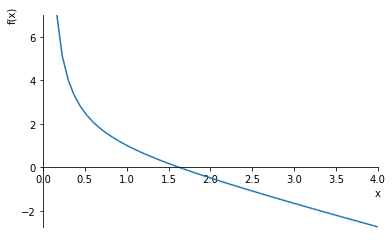

In [43]:
sp.plot(1./x - (x-1.), (x, 0, 4), ylim=(-3, 7))

아래 문장은 f(x) 을 0으로 만드는 x를 x=1 부근에서 찾는다.

In [48]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html
import scipy.optimize as so
phi = so.fsolve(f, 1.0)
phi

그 결과는 황금률의 근사값으로 유효숫자 범위 안에서는 거의 정확하다.  이 결과를 위 그림에 추가할 수도 있다.

(-3, 7)

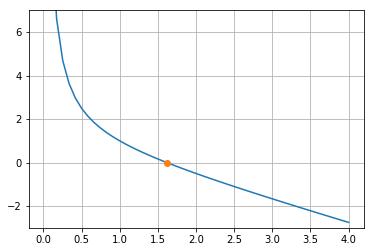

In [60]:
x = np.linspace(0.01, 4)
f_x = f(x)

ax.cla()
plt.plot(x, f_x)
plt.plot(phi, 0, 'o')
plt.ylim((-3, 7))
plt.grid(True)
plt.show()

황금 직사각형을 그리기 위한 프로그램은 다음과 같이 작성할 수도 있다.

(-0.0809016994375, 1.69893568819, -0.05, 1.05)

(-0.0809016994375, 1.69893568819, -0.05, 1.05)

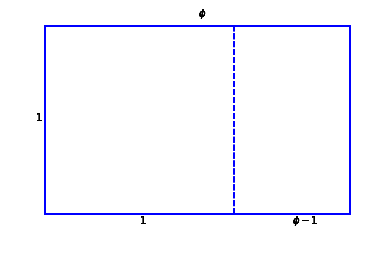

In [74]:
import numpy as np
import matplotlib.pyplot as plt

phi = (1.0 + np.sqrt(5)) * 0.5
x = [0, phi, phi, 0, 0]
y = [0, 0, 1, 1, 0]
u = [1, 1]
v = [0, 1]
plt.plot(x, y, 'b', u, v, 'b--')
# https://matplotlib.org/users/mathtext.html
plt.text(phi/2, 1.05, '$\phi$')
plt.text((1 + phi)/2, -.05, '$\phi - 1$')
plt.text(-0.05, 0.5, '1')
plt.text(0.5, -0.05, '1')
plt.axis('equal')
plt.axis('off')
ax = plt.gca()
ax.set_facecolor('white')
plt.show()

x, y 각각 5개씩의 요소를 가지고 있다. $(x_k,y_k)$ 쌍을 순서대로 직선으로 이어서 바깥 직사각형을 만들었다. u, v 벡터는 각각 2개씩의 요소를 담고 있다. $(u_1,v_1)$ 과 $(u_2,v_2)$ 를 잇는 선이 직사각형을 정사각형과 작은 직사각형으로 나눈다. ``plot`` 명령으로 이러한 선을 그린다. x-y 선은 파란 실선으로, u-v 선은 파란 점선으로. 그후의 4 명령문은 문자를 여러 장소에 표시한다. '\\phi' 는 그리스 문자를 뜻한다. 두 ``axis``문은 x y 방향의 축척이 같도록 한 후 축의 표시를 제거한다. 마지막 문장은 현재 축 get current axis 의 배경 색을 정한다.

연분수 continued fraction 은 무한식으로 다음과 같은 [형태](https://tex.stackexchange.com/questions/73195)를 가진다. $a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{a_3 + \cdots}}} $ 

만일 모든 a_k가 1이라면, 연분수는 황금률을 표현하는 또 하나의 방식이 된다.

$\phi = 1 + \cfrac{1}{1 + \cfrac{1}{1 + \cfrac{1}{1 + \cdots}}} $

다음 함수는 연분수 근사치로 \phi 를 계산한다.

In [88]:
def goldfract(n):
    """
    Golden ratio continued fraction
    :param n: 
    :return: 
    """
    p = '1.0'
    for k in range(n):
        p = '1.0 + 1.0 / (' + p + ')'
    
    # string result
    print('p = %s' % p)
    
    p = 1.0
    q = 1.0
    for k in range(n):
        s = p
        p += q
        q = s
    
    # fraction result
    p = '%r/%r' % (p, q)
    print('p = %s'% p)
    
    # float result
    p_float = eval(p)
    print('p = %.16g' % p_float)

    # error
    print('err = %g' % ((1.0 + 5**.5)*0.5 - p_float))

goldfract(6)

p = 1.0 + 1.0 / (1.0 + 1.0 / (1.0 + 1.0 / (1.0 + 1.0 / (1.0 + 1.0 / (1.0 + 1.0 / (1.0))))))
p = 21.0/13.0
p = 1.615384615384615
err = 0.00264937


위 예에서 황금률을 표시하는 3가지 방법이 제시되었다.  첫번째는 여섯항까지의 연분수이다. 6개의 오른쪽 괄호가 나타난다. 이것은 처음에는 문자열 '1.0' (이것은 goldfract(0) 의 결과이다) 로 시작하여 생성된 문자열로 앞에는 '1.0 + 1.0 / (', 뒤에는 ')' 을 반복적으로 덧붙인 것이다. 아무리 길어져도 이것은 유효한 명령문이 된다.
두번째 ``p`` 는 일반적인 분수로 첫번째 ``p`` 를 요약하여 분자와 분모에 한개씩의 정수를 포함하는 것이다. 이 식의 기저에는 다음과 같은 관계가 있다.

$1 + \frac{1}{\frac{p}{q}} = \frac{p + q}{p}$ 

따라서 반복식은 아래에서 시작한다

$\frac{1}{1}$

그리고 반복적으로 분수 

$\frac{p}{q}$

를

$\frac{p + q}{q}$

로 바꾼다. 명령문
``p = '%r/%r' % (p, q)``
은 ``p`` 와 ``q`` 를 숫자로 표시하고 사이에 '/' 를 넣는다.

세번째 ``p`` 는 앞의 두 ``p``와 같은 숫자이지만, 일반적인 십진수로 표시된 것으로 ``eval()`` 함수로 두번째 ``p`` 값을 실제로 연산하여 얻은 것이다.

마지막 값인 ``err``은 ``p``와 $\phi$ 의 차이다. 연분수로 6번째 항 까지만 계산한 결과지만 3자리 까지 정확하다. 10자리 까지 정확하게 하려면 몇개의 항이 필요할까?


